In [2]:
import networkx as nx
import pandas as pd
import numpy as np

import geopandas as gpd
from shapely.geometry import Point, shape, Polygon
import json
import matplotlib.pyplot as plt

import random
from utils import get_osrm_distance
from utils import draw_graph
from utils import calculate_weighted_metrics
from tqdm import tqdm, trange
import os
from utils import weighted_mean


In [7]:
from shapely.geometry import Point, MultiPoint

germany_boundary = gpd.read_file('boundaries/4_niedrig.geo.json')

# Crea un poligono unico dai confini dei Bundesländer
germany_polygon = germany_boundary.geometry.unary_union

def calculate_network_to_country_area_ratio(graph, country_polygon):
        # Ottieni le coordinate dei nodi nel grafo.
        # node_coordinates = [node for node in graph.nodes()]
        node_coordinates = [(graph.nodes[node]['longitude'], graph.nodes[node]['latitude']) for node in graph.nodes()]
        # Crea un poligono che rappresenta l'area coperta dalla rete.
        network_polygon = MultiPoint(node_coordinates).convex_hull
        # Calcola l'area del poligono della rete.
        network_area = network_polygon.area
        # Calcola l'area del poligono del paese.
        country_area = country_polygon.area
        # Calcola e restituisce il rapporto tra l'area della rete e l'area del paese.
        return network_area / country_area

In [8]:
def fitness_function(graph, year, max_distance=100):


        # Calcola le metriche del grafo aggiornato
        metrics = calculate_weighted_metrics(graph, year)

        # Calcola le nuove metriche
        network_to_country_area_ratio = calculate_network_to_country_area_ratio(graph, germany_polygon)
        # population_coverage = calculate_population_coverage(updated_graph, population_data, rural_threshold, city_threshold)

        # Definisci i pesi per le diverse metriche
        weights = [0.3, 0.1, 0.1, 0.1, 0.4]  # pesi per average_distance, diameter, average_clustering, density, network_to_country_area_ratio, population_coverage
        # values = [metrics["average_distance"], metrics["diameter"], metrics["average_clustering"], metrics["density"], 1-network_to_country_area_ratio]

        normalized_average_distance = (metrics["average_distance"]-15.10)/(58.43-15.20)
        normalized_diameter = (metrics["diameter"] - 1) / (11-1)
        normalized_average_clustering = (metrics["average_clustering"] - 0.72) / (0.93-0.72)
        normalized_density = (metrics["density"] - 0.08) / (1-0.08)

        values = [normalized_average_distance, normalized_diameter, normalized_average_clustering, 1-normalized_density, 1-network_to_country_area_ratio]

        fitness = weighted_mean(values, weights)
        return fitness

In [10]:
year = [2011, 2012, 2013, 2014, 2015, 2016, 2017]

for yr in year:

    # filename_opt=f"network_graphs_optimized/network_{yr}.graphml"
    # graph_opt = nx.read_graphml(filename_opt)
    # m = calculate_weighted_metrics(graph_opt, yr)
    # print(m)


    # filename_real=f"network_graphs_save/network_{yr}_100.graphml"
    # graph_opt = nx.read_graphml(filename_opt)
    # draw_graph(graph_opt)

    # filename_opt=f"network_graphs_optimized/network_{yr}.graphml"
    filename_real=f"network_graphs_save/network_{yr}_100.graphml"
    graph_opt = nx.read_graphml(filename_real)
    fit = fitness_function(graph_opt, yr, germany_polygon)
    print('For year', yr, 'the fitness is', fit)
    

For year 2011 the fitness is 0.4912009622505193
For year 2012 the fitness is 0.5302679380831887
For year 2013 the fitness is 0.48607512374315187
For year 2014 the fitness is 0.4598638067195835
For year 2015 the fitness is 0.4458546040335607
For year 2016 the fitness is 0.4135898089630172
For year 2017 the fitness is 0.4094556815707169


In [7]:
filename_real=f"network_graphs_optimized/network_{2015}_v2.graphml"
graph_opt = nx.read_graphml(filename_real)
m = calculate_weighted_metrics(graph_opt, 2015)
print(m)

{'density': 0.10890041339703442, 'average_distance': 58.49459847351148, 'diameter': 10.0, 'average_clustering': 0.709, 'year': 2015, 'total_nodes': 1393, 'subnetwork_sizes': [1393]}


C:\Users\Q540900\AppData\Roaming\Python\Python37\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


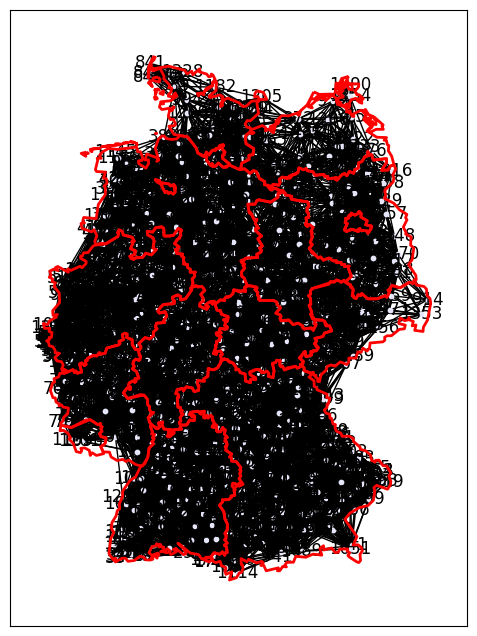

In [8]:
draw_graph(graph_opt)

In [3]:
filename_real=f"network_graphs_optimized/network_{2012}_v2.graphml"
graph_opt = nx.read_graphml(filename_real)
m = calculate_weighted_metrics(graph_opt, 2012)
print(m)

{'density': 0.14167576845061633, 'average_distance': 50.00547967553871, 'diameter': 9.0, 'average_clustering': 0.768, 'year': 2012, 'total_nodes': 494, 'subnetwork_sizes': [494]}


C:\Users\Q540900\AppData\Roaming\Python\Python37\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


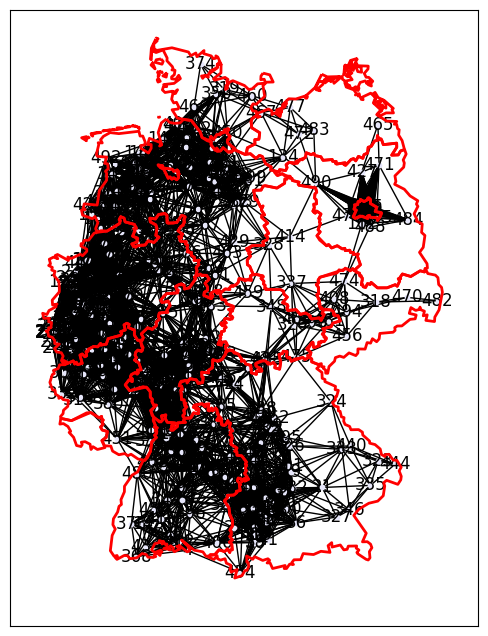

In [4]:
draw_graph(graph_opt)